<a href="https://colab.research.google.com/github/ausfear/Python/blob/main/Machine%20Learning%20Projects/Kelas%20Pengembangan%20ML/PengembanganML_7_yelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/yelp_labelled.txt', names=['sentences', 'label'], sep='\t')
df.head()

,sentences,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
from sklearn.model_selection import train_test_split

sentence = df['sentences'].values
label = df['label'].values
sentence_train, sentence_test, label_train, label_test = train_test_split(sentence, label, test_size=0.2)

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(sentence_train)
tokenizer.fit_on_texts(sentence_test)

sequence_train = tokenizer.texts_to_sequences(sentence_train)
sequence_test = tokenizer.texts_to_sequences(sentence_test)

padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)


In [8]:
import tensorflow as tf

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(250, 16, input_length=20),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
training = model.fit(padded_train, label_train, epochs=25, validation_data=(padded_test, label_test), verbose=2)

Epoch 1/25
25/25 - 1s - loss: 0.6928 - accuracy: 0.5075 - val_loss: 0.6920 - val_accuracy: 0.6000
Epoch 2/25
25/25 - 0s - loss: 0.6915 - accuracy: 0.5900 - val_loss: 0.6907 - val_accuracy: 0.6450
Epoch 3/25
25/25 - 0s - loss: 0.6897 - accuracy: 0.6463 - val_loss: 0.6885 - val_accuracy: 0.6800
Epoch 4/25
25/25 - 0s - loss: 0.6862 - accuracy: 0.6687 - val_loss: 0.6840 - val_accuracy: 0.6650
Epoch 5/25
25/25 - 0s - loss: 0.6802 - accuracy: 0.6413 - val_loss: 0.6776 - val_accuracy: 0.6600
Epoch 6/25
25/25 - 0s - loss: 0.6716 - accuracy: 0.6850 - val_loss: 0.6694 - val_accuracy: 0.7250
Epoch 7/25
25/25 - 0s - loss: 0.6597 - accuracy: 0.6850 - val_loss: 0.6572 - val_accuracy: 0.6950
Epoch 8/25
25/25 - 0s - loss: 0.6441 - accuracy: 0.7188 - val_loss: 0.6427 - val_accuracy: 0.6850
Epoch 9/25
25/25 - 0s - loss: 0.6254 - accuracy: 0.7300 - val_loss: 0.6261 - val_accuracy: 0.7350
Epoch 10/25
25/25 - 0s - loss: 0.6032 - accuracy: 0.7575 - val_loss: 0.6075 - val_accuracy: 0.7500
Epoch 11/25
25/25 -

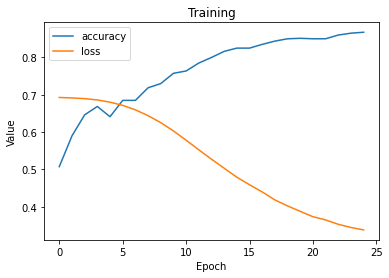

In [11]:
import matplotlib.pyplot as plt

plt.plot(training.history['accuracy'])
plt.plot(training.history['loss'])
plt.title('Training')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'])
plt.show()

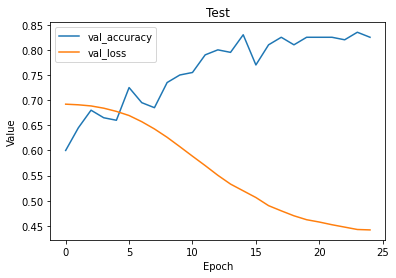

In [12]:
plt.plot(training.history['val_accuracy'])
plt.plot(training.history['val_loss'])
plt.title('Test')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['val_accuracy', 'val_loss'])
plt.show()